Complete the code in the blocks below. Do not alter blocks that indicate that they should not be changed.

Look for blocks that say "FILL IN THIS SECTION"



**FILL IN THIS SECTION**

Author(s):

In [1]:
import networkx as nx
from random import randint, sample
from time import perf_counter
from random import sample

The block below will use NetworkX to define a small graph representing central Texas.

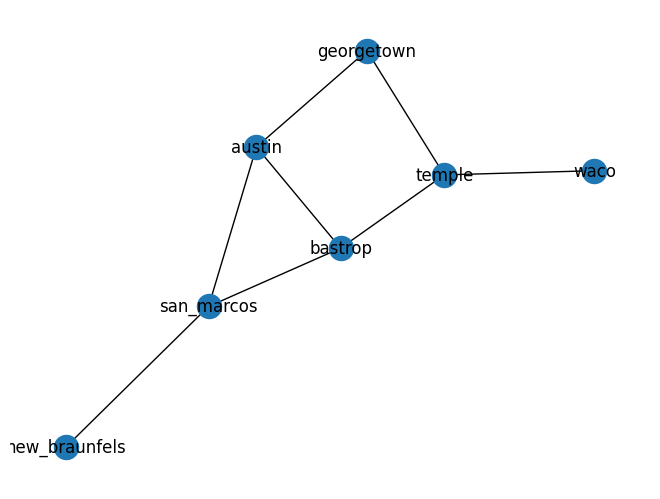

In [8]:
# Build a small graph #
# Do Not Change! #

map = nx.Graph()
map.add_nodes_from(["austin", "georgetown", "san_marcos", "bastrop",
                    "new_braunfels", "temple", "waco"])
map.add_weighted_edges_from([
    ('austin', 'georgetown', 32),
    ('georgetown', 'temple', 41),
    ('austin', 'bastrop', 30),
    ('bastrop', 'temple', 75),
    ('temple', 'waco', 35),
    ('austin', 'san_marcos', 32),
    ('bastrop', 'san_marcos', 44),
    ('san_marcos', 'new_braunfels', 19)
])
nx.draw(map, with_labels=True)

**Uniform Cost Search**
Expand the node with lowest path cost.

Return a list containing the optimal path. The first node in your list should be the start and the last should be the target.

Return None if no path exists.

In [3]:
# FILL IN THIS SECTION
# Breadth First Search
def uniform_cost(a: str, b: str, G: nx.Graph) -> list:
  """
  Implement uniform cost breadth first search as defined in AIMA
  Your code should find the shortest path from a to b, starting a search at a
  Return a list containg a and b, with the traveled distance connecting them
  Return None if no path exists
  """
  return None

**Iterative Deepening Search**
Call depth-first search with increasing depth limits until a goal is found. You might want to define Depth First Search as a separate function.

Return a list containing the path you find. The first node in your list should be the start and the last should be the target.

Return None if no path exists.

In [4]:
# FILL IN THIS SECTION
# Depth First Search
def iterative_deepining(a: str, b: str, G: nx.Graph) -> list:
  """
  Implement iterative deepining depth first search as defined in AIMA
  Your code should find the shortest path from a to b, starting a search at a
  Return a list containg a and b, with the traveled distance connecting them
  Return None if no path exists
  """
  return None

The code block below will test your implementation of the search algorithms.

In [12]:
# Checkpoint 1
# Do Not Change!

# Test Case 1, Austin to San Marcos
# expected output [Austin, San Marcos]
uc_path = uniform_cost('austin', 'san_marcos', map)
id_path = iterative_deepining('austin', 'san_marcos', map)

assert uc_path != None, "Uniform Cost did not find path"
assert id_path != None, "Iterative Deepining did not find a path"
assert all([m == n for m,n in zip(uc_path, id_path)]), "Different paths encountered"
assert uc_path == ['austin', 'san_marcos'], "Uniform Cost found wrong path"
assert id_path == ['austin', 'san_marcos'], "Iterative Deepining found wrong path"

# Test Case 2, Austin to Dallas
# expected output None
uc_path = uniform_cost('austin', 'dallas', map)
id_path = iterative_deepining('austin', 'dallas', map)
assert uc_path == None, "Uniform Cost did find path"
assert id_path == None, "Iterative Deepining did find a path"

# Test Case 3, Invertability
# expected output [Temple, Georgetown, Austin, San Marcos, New Braunfels]
uc_path = uniform_cost('temple', 'new_braunfels', map)
id_path = iterative_deepining('temple', 'new_braunfels', map)
assert uc_path != None, "Uniform Cost did not find path"
assert id_path != None, "Iterative Deepining did not find a path"
uc_path = uniform_cost('temple', 'new_braunfels', map)
id_path = iterative_deepining('temple', 'new_braunfels', map)
path_back_uc = uniform_cost('new_braunfels', 'temple', map)
path_back_id = iterative_deepining('new_braunfels', 'temple', map)
assert path_back_uc == uc_path[::-1], "Uniform Cost finds differents paths for A to B and B to A"
assert id_path == path_back_id[::-1], "Iterative Deepening finds differents paths for A to B and B to A"



# Test Case 4, Optimal Path
assert uc_path == ['temple', 'georgetown', 'austin', 'san_marcos', 'new_braunfels'], "Uniform Cost found wrong path"
# assert id_path == [temple, georgetown, austin, san_marcos, new_braunfels], "Iterative Deepining found wrong path"


AssertionError: Uniform Cost did not find path

The block below will build a much larger graph to test your search algorithms.

In [ ]:
# We need a bigger graph...
# Do Not Change!

# Create new graph with vertices 0-999
big_graph = nx.Graph()
node_list = [i for i in range(1000)]
big_graph.add_nodes_from(node_list)

# Randomly select 50000 pairs of nodes to connect
edge_list = []
for _ in range(50000):
  a, b = sample(node_list, 2)
  w = randint(10, 500)
  edge_list.append((a, b, w))
big_graph.add_weighted_edges_from(edge_list)
# nx.draw(big_graph, with_labels=True)

The code below will test the runtime of your two search algorithms. Try to predict which will be faster before running this block.

In [ ]:
# Checkpoint 2
# Do Not Change!
# Compare runtimes of BFS and DFS

for i in range(5):
  print(f"------Run {i+1}-----")
  a, b = sample(node_list, 2)

  start = perf_counter()
  path = uniform_cost(a, b, big_graph)
  print(f'BFS runtime: {perf_counter()-start}ms')
  print(f"Path length: {len(path)-1 if path != None else 0}")

  start = perf_counter()
  path = iterative_deepining(a, b, big_graph)
  print(f'DFS runtime: {perf_counter()-start}ms')
  print(f"Path length: {len(path)-1 if path != None else 0}")


------Run 1-----
BFS runtime: 4.911999894829933e-06ms
Path length: 0
DFS runtime: 4.324000201449962e-06ms
Path length: 0
------Run 2-----
BFS runtime: 3.963999915868044e-06ms
Path length: 0
DFS runtime: 2.6399998205306474e-06ms
Path length: 0
------Run 3-----
BFS runtime: 7.11000211595092e-07ms
Path length: 0
DFS runtime: 6.216999736352591e-06ms
Path length: 0
------Run 4-----
BFS runtime: 4.267000349500449e-06ms
Path length: 0
DFS runtime: 2.0859997675870545e-06ms
Path length: 0
------Run 5-----
BFS runtime: 3.1320000744017307e-06ms
Path length: 0
DFS runtime: 2.1760001800430473e-06ms
Path length: 0


**Bidirectional Search**

The idea behind bidirectional search is to run two simultaneous searches—one forward from the initial state and the other backward from the goal—hoping that the two searches meet in the middle.

In [ ]:
# FILL IN THIS SECTION
# Bidirectional Search
def bidirectional_search(a: str, b: str, G: nx.Graph) -> list:
  """
  Implement bidirectional search as defined in AIMA
  Your code should find the shortest path from a to b, starting a search at both
  Return a list containg a and b, with the traveled distance connecting them
  Return None if no path exists

  You will need to fill in some parts of this algorithm as it is not well-defined
  in AIMA.
  """
  return None

In [10]:
#Straight Line Distance funciton
#Do Not Change!
from math import sqrt

positions = {
    "austin" : (30.3, 97.7),
    "san_marcos" : (29.9, 97.9),
    "new_braunfels": (29.7, 98.1),
    "bastrop": (30.1, 97.3),
    "georgetown": (30.6, 97.7),
    "temple": (31.1, 97.3),
    "waco": (31.5, 97.1),
}
def straight_line_dist(a: str, b: str) -> float:
  a_pos = positions[a]
  b_pos = positions[b]
  return sqrt((a_pos[0] - b_pos[0])**2+(a_pos[0] - b_pos[0])**2)*50.0

**Greedy Best First Search**

Greedy best-first search8 tries to expand the node that is closest to the goal, on the grounds GREEDY BEST-FIRST SEARCH that this is likely to lead to a solution quickly. Thus, it evaluates nodes by using just the heuristic function.

In [11]:
# FILL IN THIS SECTION
# Greedy Best-First Search
def gbf_search(a: str, b: str, G: nx.Graph) -> list:
  """
  Implement greedy best-first search as defined in AIMA
  Your code should find the shortest path from a to b, starting a search at a
  Return a list containg a and b, with the traveled distance connecting them
  Return None if no path exists

  Use the Straight Line Distance function above as your heuristic
  """
  return None

In [9]:
# Checkpoint 3
# Do Not Change!

# Test Case 1, Austin to San Marcos
# expected output [Austin, San Marcos]
bd_path = bidirectional_search('austin', 'san_marcos', map)
gbf_path = gbf_search('austin', 'san_marcos', map)

assert bd_path != None, "Bidirectional did not find path"
assert gbf_path != None, "Greedy Breadth First did not find a path"
assert all([m == n for m,n in zip(bd_path, gbf_path)]), "Different paths encountered"
assert bd_path == ['austin', 'san_marcos'], "Bidirectional found wrong path"
assert gbf_path == ['austin', 'san_marcos'], "Greedy Breadth First found wrong path"

# Test Case 2, Austin to Dallas
# expected output None
bd_path = bidirectional_search('austin', 'dallas', map)
gbf_path = gbf_search('austin', 'dallas', map)

assert bd_path == None, "Bidirectional returned a path"
assert gbf_path == None, "Greedy Breadth First returned a path"

# Test Case 3, Temple to New Braunfels
# expected output [Temple, Georgetown, Austin, San Marcos, New Braunfels]
bd_path = bidirectional_search('temple', 'new_braunfels', map)
gbf_path = gbf_search('temple', 'new_braunfels', map)

assert bd_path != None, "Bidirectional did not find path"
assert gbf_path != None, "Greedy Breadth First did not find a path"
#GBF is not optimal
#assert all([m == n for m,n in zip(bd_path, gbf_path)]), "Different paths encountered"
path_back_bd = bidirectional_search('new_braunfels', 'temple', map)
assert path_back_bd== bd_path[::-1], "Uniform Cost finds differents paths for A to B and B to A"
path_back_gbf = gbf_search('new_braunfels', 'temple', map)
#GBF is not optimal
#assert path_back_gbf == gbf_path[::-1], "Iterative Deepening finds differents paths for A to B and B to A"


NameError: name 'bidirectional_search' is not defined

Build a graph representing Vacuum World using NetworkX.

Observe Figure 3.3 in AIMA, which shows a robot cleaning a 2-tile room. Use the GraphNode class as defined to implement the graph shown in the Figure.

Alter the scenario in the book by adding weights to the graph edges. Moving left or right should cost 2 Joules of energy, while vacuuming should cost 3 joules.

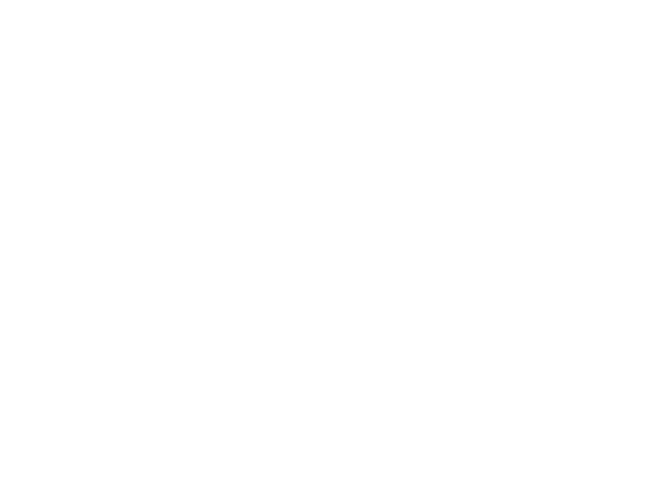

In [ ]:
# FILL IN THIS SECTION
vacuum_world = nx.Graph()

# All 8 nodes depicted in the textbook should be included in your graph.
# Use the add_neighbor function to connect nodes

# The electrical energy used my moving the robot Left or Right is 2 Joules
# The electrical energy used by the Suck action is 3 Joules

nx.draw(vacuum_world, with_labels=True)

In [ ]:
# Checkpoint 4
# FILL IN THIS SECTION

# Use the Robot Vacuum graph you've created and any one of your search functions

# Your Initial State is both locations being dirty and the robot on the left
# Print the path to a node with both locations clean that uses the least electrical energy
# You can end with the robot on the Left or Right